In [2]:
import matplotlib.pyplot as plt
import os
import random
import cv2

In [ ]:
## install the data from https://github.com/srvanderplas/jellybean_data
## in the Case_Study_and_Misc folder
## and name the data folder jellybean_data

In [6]:
current_dir = os.getcwd()

In [10]:
## path where the data is
data_path =  current_dir + "\\" + "Case_Study_and_Misc\jellybean_data-master"

In [13]:
## list the images in here
images = os.listdir(data_path)

In [14]:
# take a random flavor
sample_path = data_path + "\\" +random.sample(images,1)[0]

In [16]:
## list all images in the folder
samp_images = os.listdir(sample_path)

In [17]:
# sample a random image
sample_path = sample_path + "\\" +random.sample(samp_images,1)[0]

In [18]:
flavor = sample_path.split("\\")[-2]

In [19]:
sample_image = plt.imread(sample_path)

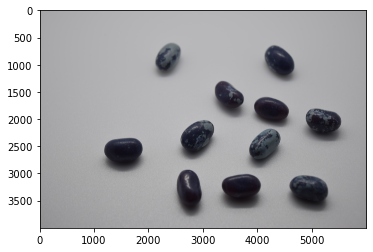

In [20]:
plt.imshow(sample_image)

In [21]:
sample_image.shape

(4000, 6000, 3)

In [22]:
from skimage.color import rgb2gray

In [23]:
gray_mask = rgb2gray(sample_image)

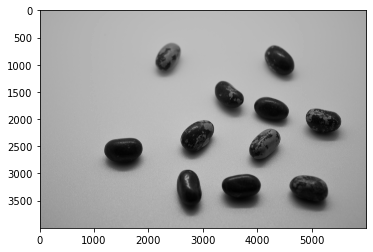

In [24]:
plt.imshow(gray_mask, "gray")
plt.show()

In [25]:
gray_mask = cv2.convertScaleAbs(gray_mask*255)

In [26]:
from skimage import exposure

img_eq = exposure.equalize_hist(gray_mask)

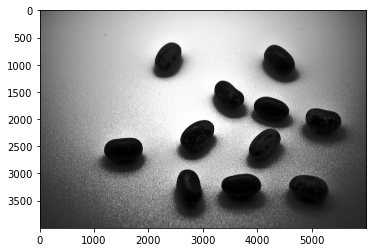

In [27]:
plt.imshow(img_eq, "gray")
plt.show()

In [28]:
from skimage.filters import threshold_otsu

In [29]:
# get the otsu thresholding
img_threshold = threshold_otsu(img_eq)

In [30]:
# threshold the image
binary = img_eq > img_threshold

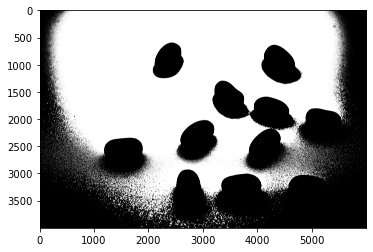

In [31]:
plt.imshow(binary, "gray")
plt.show()

In [32]:
binary = 1- binary

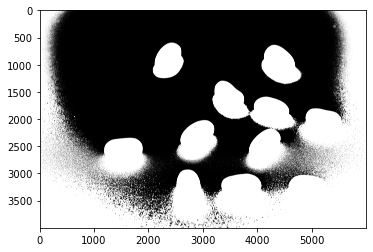

In [33]:
plt.imshow(binary, "gray")
plt.show()

In [34]:
binary = cv2.convertScaleAbs(binary*255.0)

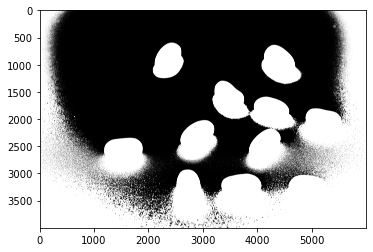

In [35]:
plt.imshow(binary, "gray")

In [36]:
from scipy import ndimage

In [37]:
fill_holes = ndimage.binary_fill_holes(binary)

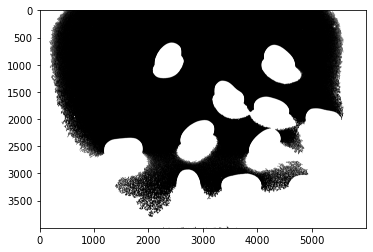

In [38]:
plt.imshow(fill_holes, "gray")

In [39]:
fill_holes = cv2.convertScaleAbs(fill_holes*255.0)

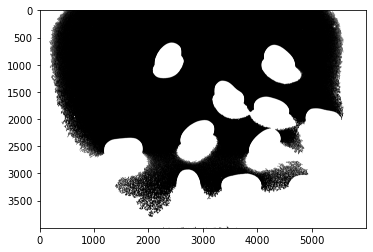

In [40]:
plt.imshow(fill_holes, "gray")

In [41]:
ret, markers = cv2.connectedComponents(fill_holes)

In [42]:
## detect contours
## and remove the biggest one
contours,hierarchy =  cv2.findContours(fill_holes,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [43]:
largest_contours = sorted(contours, key=cv2.contourArea)[-20:-1]

In [44]:
len(largest_contours)

19

In [45]:
# temp1 = np.zeros((fill_holes.shape[0], fill_holes.shape[1]))

In [46]:
# cv2.drawContours(temp1, largest_contours, -1, (255,255,255), -1)

In [47]:
# plt.imshow(temp1, "gray")


In [48]:
# img = mask_sample_bounded.reshape(mask_sample_bounded.shape[0]*mask_sample_bounded.shape[1],3)

In [49]:
import pandas as pd

In [50]:
import numpy as np

In [51]:
from tqdm.notebook import tqdm

  0%|          | 0/19 [00:00<?, ?it/s]

273971.5


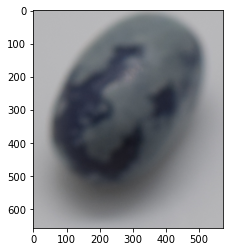

356087.0


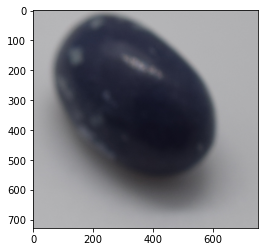

409357.5


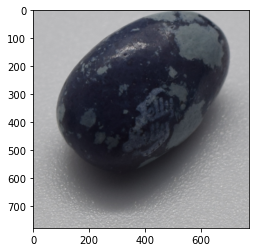

In [52]:
temp1 = np.zeros((fill_holes.shape[0], fill_holes.shape[1]))
catch_img = []
for cnt in tqdm(largest_contours): 
    area = cv2.contourArea(cnt)
#     temp = markers == cnt
#     temp = cv2.convertScaleAbs(temp*255.0)
    if (area > 10**5) & (area < 10**6):
        print(area)
        x,y,w,h = cv2.boundingRect(cnt)
        mask_sample_bounded = sample_image[y:y+h,x:x+w, :]
        plt.imshow(mask_sample_bounded)
        plt.show()
        cv2.drawContours(temp1, [cnt], -1, (255,255,255), -1)
        img = mask_sample_bounded.reshape(mask_sample_bounded.shape[0]*mask_sample_bounded.shape[1],3)
        mean_rgb = img.mean(0)
        std_rgb = img.std(0)
        mean_by_std = mean_rgb/std_rgb
        all_catch = [mean_rgb, std_rgb, mean_by_std]
        all_catch = [it for item in all_catch for it in item]
        catch_img.append(all_catch)
catch_img_df = pd.DataFrame(catch_img)
catch_img_df.columns = ["r_mean", "g_mean", "b_mean", "r_std", "g_std", "b_std", "r_mean_by_std", 
                       "g_mean_by_std", "b_mean_by_std"]
catch_img_df["flavor"] = flavor

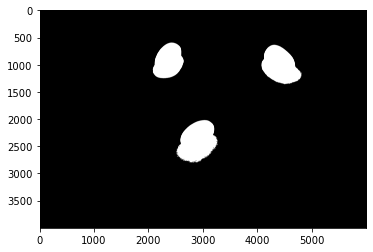

In [53]:
plt.imshow(temp1, "gray")
plt.show()

In [54]:
def get_features_image(sample_path): 
    flavor = sample_path.split("\\")[-2]
    sample_image = plt.imread(sample_path)
    gray_mask = rgb2gray(sample_image)
    gray_mask = cv2.convertScaleAbs(gray_mask*255)
    img_eq = exposure.equalize_hist(gray_mask)
    # get the otsu thresholding
    img_threshold = threshold_otsu(img_eq)
    # threshold the image
    binary = img_eq > img_threshold
    binary = 1- binary
    binary = cv2.convertScaleAbs(binary*255.0)
    fill_holes = ndimage.binary_fill_holes(binary)
    fill_holes = cv2.convertScaleAbs(fill_holes*255.0)
    ## detect contours
    ## and remove the biggest one
    contours,hierarchy =  cv2.findContours(fill_holes,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    largest_contours = sorted(contours, key=cv2.contourArea)[-20:-1]
    
    if len(largest_contours) != 19:
        return []
#     img = sample_image.reshape(sample_image.shape[0]*sample_image.shape[1],3)

    temp1 = np.zeros((fill_holes.shape[0], fill_holes.shape[1]))
    catch_img = []
    for cnt in largest_contours: 
        area = cv2.contourArea(cnt)
#     temp = markers == cnt
#     temp = cv2.convertScaleAbs(temp*255.0)
        if (area > 10**5) & (area < 10**6):
#             print(area)
            x,y,w,h = cv2.boundingRect(cnt)
            mask_sample_bounded = sample_image[y:y+h,x:x+w, :]
#             plt.imshow(mask_sample_bounded)
#             plt.show()
            cv2.drawContours(temp1, [cnt], -1, (255,255,255), -1)
            img = mask_sample_bounded.reshape(mask_sample_bounded.shape[0]*mask_sample_bounded.shape[1],3)
            mean_rgb = img.mean(0)
            std_rgb = img.std(0)
            mean_by_std = mean_rgb/std_rgb
            all_catch = [mean_rgb, std_rgb, mean_by_std]
            all_catch = [it for item in all_catch for it in item]
            catch_img.append(all_catch)
            
    catch_img_df = pd.DataFrame(catch_img)
#     if len(catch_img) !=
    catch_img_df.columns = ["r_mean", "g_mean", "b_mean", "r_std", "g_std", "b_std", "r_mean_by_std", 
                       "g_mean_by_std", "b_mean_by_std"]
    catch_img_df["flavor"] = flavor

    return catch_img_df

In [55]:
catch_img_df = get_features_image(sample_path)

In [56]:
catch_img_df.head()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,r_mean_by_std,g_mean_by_std,b_mean_by_std,flavor
0,120.062360,122.806803,128.226491,49.846340,47.986814,44.982831,2.408649,2.559178,2.850565,plum
1,113.562291,114.272874,121.656573,62.154731,61.428239,55.987366,1.827090,1.860266,2.172929,plum
2,108.020843,109.209832,115.207873,64.539319,63.833674,59.648024,1.673721,1.710850,1.931462,plum


In [64]:
out_path =  current_dir + "\\" + "Case_Study_and_Misc\ML_Case_Study"

In [66]:
# out_path

In [57]:
flavors = os.listdir(data_path)

In [58]:
import random

In [59]:
# flavors = random.sample(flavors, 20)

In [60]:
sample_paths = []

for flv in flavors:
    sample_path1 = data_path + "\\" + flv
    samp_images = os.listdir(sample_path1)
    for imgs in samp_images:
        sample_path = sample_path1 + "\\" +imgs
        sample_paths.append(sample_path)

In [61]:
len(sample_paths)

612

In [62]:
from joblib import Parallel, delayed

In [63]:
catch_all_dfs = Parallel(n_jobs=7, verbose = 6, 
                        backend = "loky")(delayed(get_features_image)(i) for i in sample_paths)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


KeyboardInterrupt: 

In [ ]:
# catch_all_dfs = []

# for sample_path in tqdm(sample_paths): 
#     if len(get_features_image(sample_path)) > 0:
#         catch_all_dfs.append(get_features_image(sample_path))

In [ ]:
catch_all_dfs_1 = [item for item in catch_all_dfs if len(item) > 0]

In [ ]:
catch_all_dfs_1 = pd.concat(catch_all_dfs_1)

In [70]:
current_dir

'D:\\Jellybean_Third'

In [71]:
out_path =  current_dir + "\\" + "Case_Study_and_Misc"

In [ ]:
catch_all_dfs_1.to_csv(out_path + "\\all.csv", index = False)

In [ ]:
catch_all_dfs_1.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
top_k = catch_all_dfs_1["flavor"].value_counts()[:20].index

In [ ]:
catch_all_dfs_1 = catch_all_dfs_1[catch_all_dfs_1["flavor"].isin(top_k)]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(catch_all_dfs_1.iloc[:,:-1], catch_all_dfs_1.iloc[:,-1], 
                                    test_size = 0.3, stratify = catch_all_dfs_1.iloc[:,-1])

In [ ]:
count_train = pd.DataFrame(y_train).value_counts().reset_index()
count_train.columns = ["flavor", "counts"]

In [ ]:
count_train

In [ ]:
import seaborn as sns

In [ ]:
plt.rcParams["font.weight"] = "bold"
plt.figure(figsize = (10,5))
sns.barplot(data = count_train, x = "flavor", y = "counts")
plt.xticks(rotation = 90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Flavor", weight = "bold", fontsize = 20)
plt.ylabel("Frequency", weight = "bold", fontsize = 20)
# plt.legend(prop={'size': 15})
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(n_jobs=6)

parameters = {'n_estimators':[100]}

In [ ]:
gs = GridSearchCV(estimator=rf, cv=5, n_jobs=6, scoring="accuracy", param_grid = parameters, verbose = 5)

In [ ]:
gs.fit(x_train, y_train)

gs.best_score_

In [ ]:
gs.best_estimator_

In [ ]:
y_test_pred = gs.predict(x_test)

In [ ]:
np.mean(y_test_pred == y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf = confusion_matrix(y_test, y_test_pred, normalize = "true", labels = top_k)

In [ ]:
df_cf = pd.DataFrame(cf, columns=top_k, index = top_k)

In [ ]:
import seaborn as sns

In [ ]:
plt.rcParams["font.weight"] = "bold"
plt.figure(figsize = (10,5))
sns.barplot(data = count_train, x = "flavor", y = "counts")
plt.xticks(rotation = 90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Flavor", weight = "bold", fontsize = 20)
plt.ylabel("Frequency", weight = "bold", fontsize = 20)
# plt.legend(prop={'size': 15})
plt.show()

In [ ]:
plt.rcParams["font.weight"] = "bold"
plt.figure(figsize = (10,10))
sns.heatmap(df_cf, cmap = "RdBu_r")
plt.xlabel("Predicted Flavor", weight = "bold", fontsize = 20)
plt.ylabel("True Flavor", weight = "bold", fontsize = 20)
plt.show()

In [ ]:
rf = gs.best_estimator_

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
rf.feature_importances_

In [ ]:
rf.feature_names_in_

In [ ]:
feat_score = zip(rf.feature_names_in_, rf.feature_importances_)

In [ ]:
feat_score_df = pd.DataFrame(list(feat_score))

In [ ]:
feat_score_df.columns = ["feature_name", "importance_score"]

In [ ]:
imp_df = feat_score_df.sort_values("importance_score", ascending = False).reset_index(drop = True)

In [ ]:
plt.rcParams["font.weight"] = "bold"
plt.figure(figsize = (10,5))
sns.barplot(data = imp_df, x = "feature_name", y = "importance_score")
plt.xticks(rotation = 90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Feature Name", weight = "bold", fontsize = 20)
plt.ylabel("Importance Score", weight = "bold", fontsize = 20)
plt.show()